In [1]:
import cf_xarray
import numpy as np
import xarray as xr
import xgcm
import xesmf as xe
import matplotlib.pyplot as plt
import xcmocean
import cmocean.cm as cmo
import xoceanmodel as xom

# Generically access model output

## Test

### MOM6

In [2]:
url = '/Users/kthyng/Downloads/20111231.ocean_daily.nc'
ds = xr.open_dataset(url)
# ds['uo'].sel(xq=slice(-155,-140), yh=slice(53,57), zl=slice(None,30)).to_netcdf('test_mom6.nc')
# xrargs = {}

In [5]:
# ds = read(url, xrargs)

#### grid point

##### horizontal interp, vertical and time isel

In [6]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = float(ds.cf[cf_var].cf['X'][0])
latitude = float(ds.cf[cf_var].cf['Y'][0])
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = 0
T = 0
isel = dict(Z=Z, T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname)

dr = xom.select(**kwargs)

# check
dr_check = ds.cf[cf_var].cf.sel(sel).cf.isel(isel)

assert np.allclose(dr, dr_check)

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xarray/core/dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


##### horizontal and vertical interp, time isel

In [14]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = float(ds.cf[cf_var].cf['X'][0])
latitude = float(ds.cf[cf_var].cf['Y'][0])
Z = float(ds.uo.zl[0])
sel = dict(longitude=longitude, latitude=latitude, Z=Z)

# isel
T = 0
isel = dict(T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, Z=Z, varname=varname)

dr = xom.select(**kwargs)

# check
dr_check = ds.cf[cf_var].cf.sel(sel).cf.isel(isel)

assert np.allclose(dr, dr_check)

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xarray/core/dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


#### not grid point

##### inside domain

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xarray/core/dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


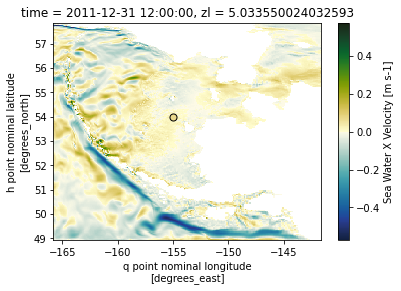

In [8]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = -155
latitude = 54
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = 0
T = 0
isel = dict(Z=Z, T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname, extrap=False)

dr = xom.select(**kwargs)

# plot
cmap = cmo.delta
dscheck = ds.cf[cf_var].cf.isel(isel)
fig, ax = plt.subplots(1,1)
dscheck.cmo.plot(ax=ax)
ax.scatter(dr.cf['longitude'], dr.cf['latitude'], s=50, c=dr, 
           vmin=dscheck.min(), vmax=dscheck.max(), cmap=cmap, edgecolors='k')

##### outside domain

Don't extrapolate

In [24]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = -166
latitude = 48
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = 0
T = 0
isel = dict(Z=Z, T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname, extrap=False)

xom.select(**kwargs)

AssertionError: the input longitude range is outside the model domain

Extrapolate

(-167.0, -143.0)

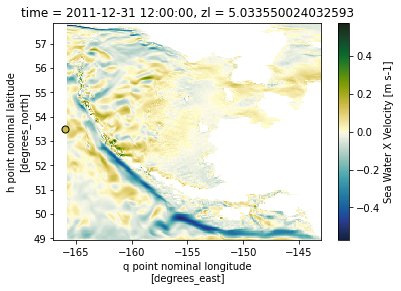

In [32]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = -166
latitude = 53.5
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = 0
T = 0
isel = dict(Z=Z, T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname, extrap=True)

dr = xom.select(**kwargs)

# plot
cmap = cmo.delta
dscheck = ds.cf[cf_var].cf.isel(isel)
fig, ax = plt.subplots(1,1)
dscheck.cmo.plot(ax=ax)
ax.scatter(dr.cf['longitude'], dr.cf['latitude'], s=50, c=dr, 
           vmin=dscheck.min(), vmax=dscheck.max(), cmap=cmap, edgecolors='k')

ax.set_xlim(-167,-143)

#### points (locstream)

Unstructured pairs of lon/lat locations instead of grids of lon/lat locations, using `locstream`.

In [26]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
# this creates 12 pairs of lon/lat points that 
# align with grid points so we can check the 
# interpolation
longitude = ds.cf[cf_var].cf['X'][::20].values
latitude = ds.cf[cf_var].cf['Y'][::24].values
# selecting individual lon/lat locations with advanced xarray indexing
sel = dict(longitude=xr.DataArray(longitude, dims="pts"), latitude=xr.DataArray(latitude, dims="pts"))

# isel
Z = 0
T = 0
isel = dict(Z=Z, T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, 
              varname=varname, locstream=True)

dr = xom.select(**kwargs)

# check
dr_check = ds.cf[cf_var].cf.isel(isel).cf.sel(sel)

assert np.allclose(dr, dr_check, equal_nan=True)

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xarray/core/dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


#### grid of known locations

In [49]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = ds.cf[cf_var].cf['X'][:5]
latitude = ds.cf[cf_var].cf['Y'][:6]
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = 0
T = 0
isel = dict(Z=Z, T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname)

dr = xom.select(**kwargs)

# check
dr_check = ds.cf[cf_var].cf.sel(sel).cf.isel(isel)

assert np.allclose(dr, dr_check)

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xarray/core/dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


#### grid of new locations

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xarray/core/dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


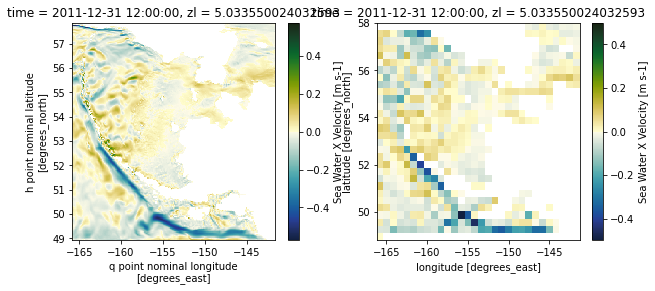

In [36]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = np.linspace(ds.cf[cf_var].cf['X'].min(), ds.cf[cf_var].cf['X'].max(), 30)
latitude = np.linspace(ds.cf[cf_var].cf['Y'].min(), ds.cf[cf_var].cf['Y'].max(), 30)
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = 0
T = 0
isel = dict(Z=Z, T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname, extrap=False, extrap_val=np.nan)

dr = xom.select(**kwargs)

# plot
cmap = cmo.delta
dscheck = ds.cf[cf_var].cf.isel(isel)

fig, axes = plt.subplots(1,2, figsize=(10,4))
dscheck.cmo.plot(ax=axes[0])
dr.cmo.plot(ax=axes[1])


### HYCOM

In [136]:
# # ds = xr.open_dataset('/Users/kthyng/Downloads/20111231.ice_daily.nc')
# ds = xr.open_dataset('http://tds.hycom.org/thredds/dodsC/GLBy0.08/expt_93.0/FMRC/GLBy0.08_930_FMRC_best.ncd', decode_times=False)
# ds = ds.drop_vars(['tau'])
# ds = xr.decode_cf(ds)
# ds.cf.isel(T=0, Z=slice(0,5)).cf.sel(lon=slice(140,190), lat=slice(-20,30)).to_netcdf('/Users/kthyng/Downloads/hycom.nc')
# ds['water_u'].sel(lat=slice(-15,-10), lon=slice(145,150)).to_netcdf('test_hycom.nc')

url = '/Users/kthyng/Downloads/hycom.nc'
xrargs = {'decode_times': False}
ds = xr.open_dataset(url, **xrargs)
# ds = read(url, xrargs)

#### grid point

In [ ]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = float(ds.cf[cf_var].cf['X'][100])
latitude = float(ds.cf[cf_var].cf['Y'][150])
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = 0
T = None
isel = dict(Z=Z)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname)

dr = xom.select(**kwargs)

# check
dr_check = ds.cf[cf_var].cf.sel(sel).cf.isel(isel)

assert np.allclose(dr, dr_check)

#### not grid point

##### inside domain

In [ ]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = 155
latitude = 5
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = 0
T = None
isel = dict(Z=Z)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname, extrap=False)

dr = xom.select(**kwargs)

# plot
cmap = cmo.delta
dscheck = ds.cf[cf_var].cf.isel(isel)
fig, ax = plt.subplots(1,1)
dscheck.cmo.plot(ax=ax)
ax.scatter(dr.cf['longitude'], dr.cf['latitude'], s=50, c=dr, 
           vmin=dscheck.min(), vmax=dscheck.max(), cmap=cmap, edgecolors='k')

##### outside domain

Don't extrapolate

In [20]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = -166
latitude = 48
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = 0
T = 0
isel = dict(Z=Z, T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname, extrap=False)

dr = xom.select(**kwargs)
dr

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/cf_xarray/accessor.py:1287: UserWarning: Variables {''} not found in object but are referred to in the CF attributes.
  warnings.warn(


AssertionError: the input longitude range is outside the model domain

Extrapolate

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/cf_xarray/accessor.py:1287: UserWarning: Variables {''} not found in object but are referred to in the CF attributes.
  warnings.warn(
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xarray/core/dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


(138.0, 190.0)

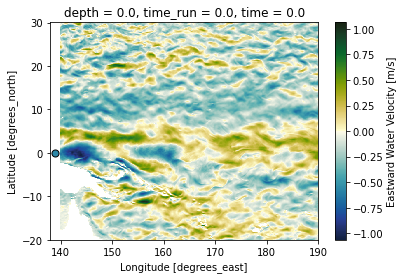

In [22]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = 139
latitude = 0
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = 0
T = None
isel = dict(Z=Z)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname, extrap=True)

dr = xom.select(**kwargs)

# plot
cmap = cmo.delta
dscheck = ds.cf[cf_var].cf.isel(isel)
fig, ax = plt.subplots(1,1)
dscheck.cmo.plot(ax=ax)
ax.scatter(dr.cf['longitude'], dr.cf['latitude'], s=50, c=dr, 
           vmin=dscheck.min(), vmax=dscheck.max(), cmap=cmap, edgecolors='k')

ax.set_xlim(138,190)

#### points (locstream)

Unstructured pairs of lon/lat locations instead of grids of lon/lat locations, using `locstream`.

In [40]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
# this creates 12 pairs of lon/lat points that 
# align with grid points so we can check the 
# interpolation
longitude = ds.cf[cf_var].cf['X'][::40].values
latitude = ds.cf[cf_var].cf['Y'][::80].values
# selecting individual lon/lat locations with advanced xarray indexing
sel = dict(longitude=xr.DataArray(longitude, dims="pts"), latitude=xr.DataArray(latitude, dims="pts"))

# isel
Z = 0
isel = dict(Z=Z)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iZ=Z, 
              varname=varname, locstream=True)

dr = xom.select(**kwargs)

# check
dr_check = ds.cf[cf_var].cf.isel(isel).cf.sel(sel)

assert np.allclose(dr, dr_check, equal_nan=True)

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xarray/core/dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/cf_xarray/accessor.py:1287: UserWarning: Variables {''} not found in object but are referred to in the CF attributes.
  warnings.warn(


#### grid of known locations

In [23]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = ds.cf[cf_var].cf['X'][100::500]
latitude = ds.cf[cf_var].cf['Y'][100::500]
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = 0
T = None
isel = dict(Z=Z)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname)

dr = xom.select(**kwargs)

# check
dr_check = ds.cf[cf_var].cf.sel(sel).cf.isel(isel)

assert np.allclose(dr, dr_check)

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/cf_xarray/accessor.py:1287: UserWarning: Variables {''} not found in object but are referred to in the CF attributes.
  warnings.warn(
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xarray/core/dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/cf_xarray/accessor.py:1287: UserWarning: Variables {''} not found in object but are referred to in the CF attributes.
  warnings.warn(


#### grid of new locations

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/cf_xarray/accessor.py:1287: UserWarning: Variables {''} not found in object but are referred to in the CF attributes.
  warnings.warn(
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/cf_xarray/accessor.py:1287: UserWarning: Variables {''} not found in object but are referred to in the CF attributes.
  warnings.warn(
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/cf_xarray/accessor.py:1287: UserWarning: Variables {''} not found in object but are referred to in the CF attributes.
  warnings.warn(
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/cf_xarray/accessor.py:1287: UserWarning: Variables {''} not found in object but are referred to in the CF attributes.
  warnings.warn(
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xarray/core/dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform element

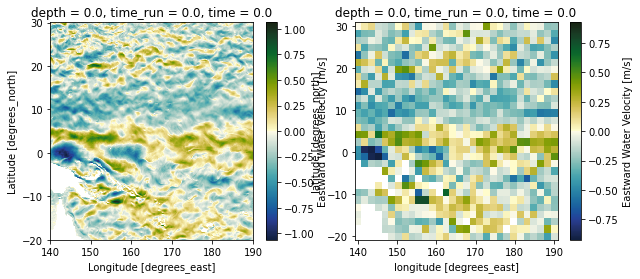

In [24]:
varname = 'u'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = np.linspace(ds.cf[cf_var].cf['X'].min(), ds.cf[cf_var].cf['X'].max(), 30)
latitude = np.linspace(ds.cf[cf_var].cf['Y'].min(), ds.cf[cf_var].cf['Y'].max(), 30)
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = 0
T = None
isel = dict(Z=Z)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname)

dr = xom.select(**kwargs)

# plot
cmap = cmo.delta
dscheck = ds.cf[cf_var].cf.isel(isel)

fig, axes = plt.subplots(1,2, figsize=(10,4))
dscheck.cmo.plot(ax=axes[0])
dr.cmo.plot(ax=axes[1])


### ROMS

In [85]:
# import xroms 

# open an example dataset from xarray's tutorials
ds = xr.tutorial.open_dataset('ROMS_example.nc', chunks={'ocean_time': 1})
xrargs = {}
ds.zeta.attrs['standard_name'] = 'sea_surface_elevation'
for dim, ax in zip(['xi_rho', 'eta_rho', 'ocean_time'],['X','Y','T']):
    ds[dim] = (dim, np.arange(ds.sizes[dim]), {"axis": ax})
ds.ocean_time.attrs["standard_name"] = "time"
# ds['zeta'].isel(xi_rho=slice(100,200)).to_netcdf('test_roms.nc')
ds

<xarray.Dataset>
Dimensions:     (eta_rho: 191, ocean_time: 2, s_rho: 30, xi_rho: 371)
Coordinates:
    Cs_r        (s_rho) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(191, 371), meta=np.ndarray>
    hc          float64 ...
    h           (eta_rho, xi_rho) float64 dask.array<chunksize=(191, 371), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(191, 371), meta=np.ndarray>
    Vtransform  int32 ...
  * ocean_time  (ocean_time) int64 0 1
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 7 ... 364 365 366 367 368 369 370
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 7 ... 184 185 186 187 188 189 190
Data variables:
    salt        (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 30, 191, 371), meta=np.ndarray>
    zeta        (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 191, 371), meta=np.ndarray>
Attributes: (12/34)
    file:              ../output_20yr_obc/2001/ocean_his_0015.nc
    format:            netCDF-4/HDF5 file
    Conventions:       CF-1.4
    type:              ROMS/TOMS history file
    title:             TXLA ROMS hindcast run with dyes and oxygen
    rst_file:          ../output_20yr_obc/2001/ocean_rst.nc
    ...                ...
    compiler_flags:    -heap-arrays -fp-model fast -mt_mpi -ip -O3 -msse2 -free
    tiling:            010x012
    history:           Tue Jul 24 11:04:43 2018: /opt/nco/ncks -D 4 -t 8 /cop...
    ana_file:          /home/d.kobashi/TXLA_ROMS_reana/Functionals/ana_btflux...
    CPP_options:       TXLA2, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX, ANA_NUDGCOE...
    NCO:               netCDF Operators version 4.7.6-alpha04 (Homepage = htt...

In [5]:
# ds = read(url, xrargs)

#### grid point

In [83]:
varname = 'ssh'
cf_var = xom.get_var_cf(ds, varname)

# sel
j, i = 50, 10
longitude = float(ds.cf[cf_var].cf['longitude'][j,i])
latitude = float(ds.cf[cf_var].cf['latitude'][j,i])

# isel
Z = None
T = 0
isel = dict(T=T,X=i, Y=j)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname)

dr = xom.select(**kwargs)

# check
dr_check = ds.cf[cf_var].cf.isel(isel)

assert np.allclose(dr, dr_check)

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/dask/array/core.py:383: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


#### not grid point

##### inside domain

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xarray/core/dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


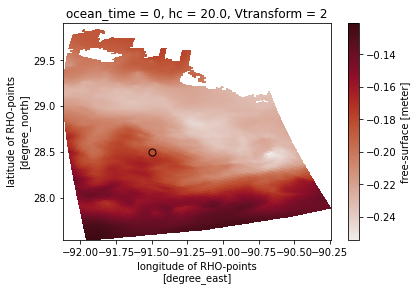

In [105]:
varname = 'ssh'
cf_var = xom.get_var_cf(ds, varname)

# sel
longitude = -91.5
latitude = 28.5

# isel
Z = None
T = 0
isel = dict(T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, varname=varname, extrap=False)

dr = xom.select(**kwargs)

# plot
cmap = ds.cf[cf_var].cmo.seq
dscheck = ds.cf[cf_var].cf.isel(isel)
fig, ax = plt.subplots(1,1)
dscheck.cmo.cfplot(ax=ax, x='longitude', y='latitude')
ax.scatter(dr.cf['longitude'], dr.cf['latitude'], s=50, c=dr, 
           vmin=dscheck.min().values, vmax=dscheck.max().values, cmap=cmap, edgecolors='k')

##### outside domain

Don't extrapolate

In [26]:
varname = 'ssh'
cf_var = get_var_cf(varname)

# sel
longitude = -166
latitude = 48
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = 0
T = 0
isel = dict(Z=Z, T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iz=Z, varname=varname, extrap=False)

dr = select(**kwargs)
dr

AssertionError: the input longitude range is outside the model domain

Extrapolate

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/dask/array/core.py:383: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


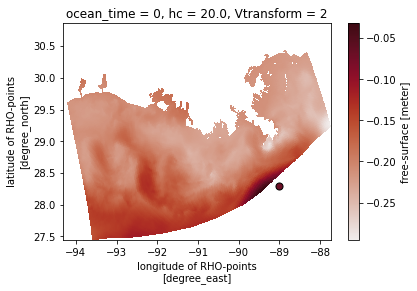

In [27]:
varname = 'ssh'
cf_var = get_var_cf(varname)

# sel
longitude = -89
latitude = 28.3
sel = dict(longitude=longitude, latitude=latitude)

# isel
Z = None
T = 0
isel = dict(T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iz=Z, varname=varname, extrap=True)

dr = select(**kwargs)

# plot
cmap = ds.cf[cf_var].cmo.seq
cf_var = get_var_cf(varname)
dscheck = ds.cf[cf_var].cf.isel(isel)
fig, ax = plt.subplots(1,1)
dscheck.cmo.cfplot(ax=ax, x='longitude', y='latitude')
ax.scatter(dr.cf['longitude'], dr.cf['latitude'], s=50, c=dr, 
           vmin=dscheck.min().values, vmax=dscheck.max().values, cmap=cmap, edgecolors='k')


#### points (locstream)

Unstructured pairs of lon/lat locations instead of grids of lon/lat locations, using `locstream`.

In [124]:
varname = 'ssh'
cf_var = xom.get_var_cf(ds, varname)

# sel
# this creates 12 pairs of lon/lat points that 
# align with grid points so we can check the 
# interpolation
# longitude = ds.cf[cf_var].cf['X'][::20].values
# latitude = ds.cf[cf_var].cf['Y'][::24].values
# # selecting individual lon/lat locations with advanced xarray indexing
# sel = dict(longitude=xr.DataArray(longitude, dims="pts"), latitude=xr.DataArray(latitude, dims="pts"))

longitude = ds.cf[cf_var].cf['longitude'].isel(eta_rho=50, xi_rho=slice(None,None,10))
latitude = ds.cf[cf_var].cf['latitude'].isel(eta_rho=50, xi_rho=slice(None,None,10))
sel = dict(X=longitude.xi_rho, Y=longitude.eta_rho)

# isel
Z = None
T = 0
isel = dict(T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iZ=Z, 
              varname=varname, locstream=True)

dr = xom.select(**kwargs)

# check
dr_check = ds.cf[cf_var].cf.isel(isel).cf.sel(sel)

assert np.allclose(dr, dr_check, equal_nan=True)

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xarray/core/dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


#### grid of known locations

In [29]:
varname = 'ssh'
cf_var = get_var_cf(varname)

# sel
longitude = ds.cf[cf_var].cf['longitude'][:-50:20,:-200:100]
latitude = ds.cf[cf_var].cf['latitude'][:-50:20,:-200:100]
sel = dict(X=longitude.xi_rho, Y=longitude.eta_rho)

# isel
Z = None
T = 0
isel = dict(T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iz=Z, varname=varname)

dr = select(**kwargs)

# check
dr_check = ds.cf[get_var_cf(varname)].cf.sel(sel).cf.isel(isel)

assert np.allclose(dr, dr_check)

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/dask/array/core.py:383: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


#### grid of new locations

/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/dask/array/core.py:383: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/Users/kthyng/miniconda3/envs/xroms/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


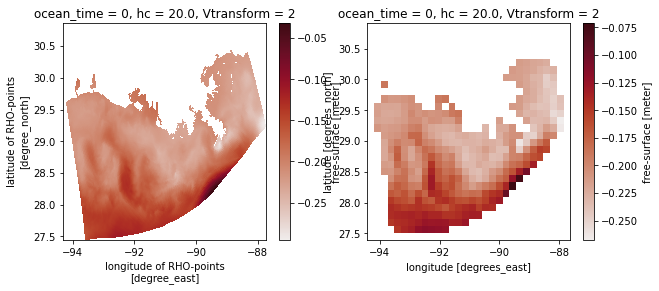

In [30]:
varname = 'ssh'
cf_var = get_var_cf(varname)

# sel
longitude = np.linspace(ds.cf[cf_var].cf['longitude'].min(), ds.cf[cf_var].cf['longitude'].max(), 30)
latitude = np.linspace(ds.cf[cf_var].cf['latitude'].min(), ds.cf[cf_var].cf['latitude'].max(), 30)

# isel
Z = None
T = 0
isel = dict(T=T)

kwargs = dict(ds=ds, longitude=longitude, latitude=latitude, iT=T, iz=Z, varname=varname, extrap=False, extrap_val=np.nan)

dr = select(**kwargs)

# plot
cmap = cmo.delta
cf_var = get_var_cf(varname)
dscheck = ds.cf[cf_var].cf.isel(isel)

fig, axes = plt.subplots(1,2, figsize=(10,4))
dscheck.cmo.cfplot(ax=axes[0], x='longitude', y='latitude')
dr.cmo.cfplot(ax=axes[1], x='longitude', y='latitude')
